In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv('c:\\Users\\USER\\Downloads\diamonds.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_15088\3721847845.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('c:\\Users\\USER\\Downloads\diamonds.csv')


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#deleting Teh unnecessary files

df=df.drop(columns=['Unnamed: 0'])

In [5]:
df=df.drop_duplicates()

In [6]:
f"The New Look of Total of {df.shape[0]} rows  and {df.shape[1]} columns"

'The New Look of Total of 53794 rows  and 10 columns'

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
from sklearn.preprocessing import LabelEncoder

code=LabelEncoder()
df['cut']=code.fit_transform(df['cut'])
df['color']=code.fit_transform(df['color'])
df['clarity']=code.fit_transform(df[ 'clarity'])

<Axes: >

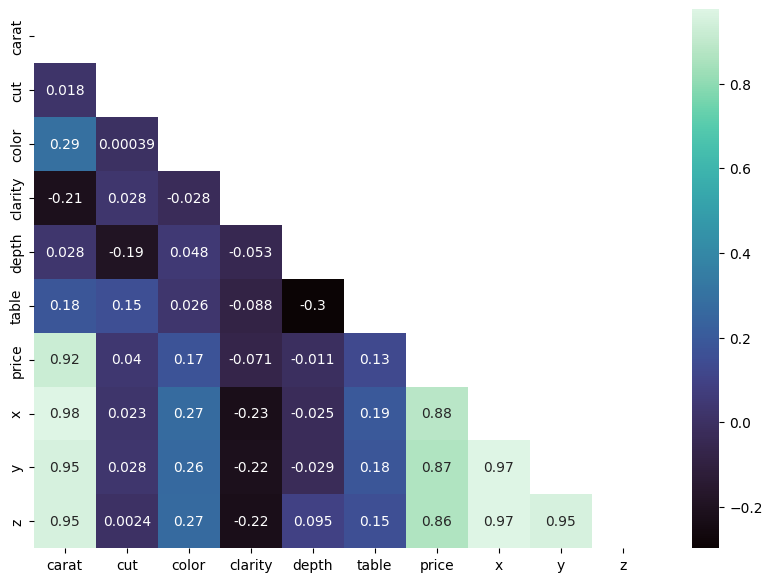

In [9]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10,7),dpi=100)
mask=np.triu(np.ones_like(df.corr(),dtype='bool'))
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='mako')

In [10]:
X_train=df.drop(columns=['x','y','z','price'])
y_train=df['price']
X_test=df.drop(columns=['x','y','z','price'])
y_test=df['price']

In [13]:
df.describe().T.drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
carat,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
cut,2.553947,1.027569,0.0,2.00,2.00,3.00,4.00
color,2.593914,1.701117,0.0,1.00,3.00,4.00,6.00
clarity,3.835762,1.724872,0.0,2.00,4.00,5.00,7.00
depth,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [24]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
run_experiment(model)

R^2 :  0.8803482563525186
MAE : 930.6263040365453
RMSE: 1379.5044109058902


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
models=ExtraTreesRegressor()
run_experiment(models)

R^2 :  0.9997492614786025
MAE : 22.146071123173588
RMSE: 63.15010947790156


In [28]:
from joblib import dump

dump(models,'ExtraTreesRegressor.joblib')

['ExtraTreesRegressor.joblib']